# <span style = 'color: #17B890'> GROUP 5 SARRIA </span>
# <span style = 'color: #17B890'> _____________________________________ </span>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()
#df_test.head()


,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price
0,9255,1.0,1.0,NaN,NaN,1956.0,3º - 1a,False,False,Sant Martí,2.0,True,True,NaN,1096
1,1562,4.0,1.0,133.0,west,1960.0,7º - 2a,False,False,Sants,4.0,False,False,2.0,1396
2,1671,2.0,3.0,137.0,NaN,2000.0,1º - 1a,False,True,Eixample,0.0,False,False,NaN,1263
3,6088,1.0,2.0,-41.0,NaN,2002.0,6º - 1a,False,True,Sants,5.0,False,False,NaN,1290
4,6670,2.0,1.0,70.0,NaN,1979.0,5º - 1a,True,False,Gràcia,0.0,False,True,3.0,962


## <span style = "color: #F96E46"> EXPLORATORY ANALYSIS </span>
## <span style = "color: #F96E46"> __________________________________ </span>

In [102]:
df_train.head()

,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price
0,9255,1.0,1.0,NaN,NaN,1956.0,3º - 1a,False,False,Sant Martí,2.0,True,True,NaN,1096
1,1562,4.0,1.0,133.0,west,1960.0,7º - 2a,False,False,Sants,4.0,False,False,2.0,1396
2,1671,2.0,3.0,137.0,NaN,2000.0,1º - 1a,False,True,Eixample,0.0,False,False,NaN,1263
3,6088,1.0,2.0,-41.0,NaN,2002.0,6º - 1a,False,True,Sants,5.0,False,False,NaN,1290
4,6670,2.0,1.0,70.0,NaN,1979.0,5º - 1a,True,False,Gràcia,0.0,False,True,3.0,962


In [3]:
# Start the exploration
print(len(df_test['id'].unique()))
df_train.describe()

2000


,id,num_rooms,num_baths,square_meters,year_built,num_crimes,num_supermarkets,price
count,8000.000000,8000.000000,7840.000000,7845.000000,7830.000000,7840.000000,1411.000000,8000.000000
mean,5012.506875,2.868500,1.988265,108.031995,1985.321073,2.803444,1.982991,1099.616250
std,2887.649416,5.300469,0.815943,38.671420,20.591437,3.447714,0.803182,271.686617
min,2.000000,1.000000,1.000000,-100.000000,1950.000000,0.000000,1.000000,195.000000
25%,2512.750000,1.000000,1.000000,78.000000,1968.000000,0.000000,1.000000,905.750000
50%,5014.500000,2.000000,2.000000,110.000000,1985.000000,1.000000,2.000000,1104.000000
75%,7505.250000,4.000000,3.000000,140.000000,2003.000000,6.000000,3.000000,1295.000000
max,10000.000000,97.000000,3.000000,170.000000,2021.000000,10.000000,3.000000,2095.000000


In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8000 non-null   int64  
 1   num_rooms         8000 non-null   float64
 2   num_baths         7840 non-null   float64
 3   square_meters     7845 non-null   float64
 4   orientation       5659 non-null   object 
 5   year_built        7830 non-null   float64
 6   door              7851 non-null   object 
 7   is_furnished      7835 non-null   object 
 8   has_pool          7844 non-null   object 
 9   neighborhood      7835 non-null   object 
 10  num_crimes        7840 non-null   float64
 11  has_ac            7831 non-null   object 
 12  accepts_pets      7845 non-null   object 
 13  num_supermarkets  1411 non-null   float64
 14  price             8000 non-null   int64  
dtypes: float64(6), int64(2), object(7)
memory usage: 937.6+ KB


In [4]:
'''
Before we start the rest of the exploration, we need to format some variables to make it easier and more intuitive.

1. We will extract the variables floor and door from the variable 'door' and format them in a usable way.
2. We will make sure that the variables have consistent labels. 
'''

# We create variables floor and door from the variable 'door'

df_train['num_floor'] = pd.to_numeric(df_train['door'].str.split('º').str[0], errors = 'coerce')
df_train.describe()

#print(df_train['door'].unique())
#print(df_train['door'].str.split(' '))

df_train['num_door'] = pd.to_numeric(df_train['door'].str.split(' ').str[2].str[0], errors = 'coerce')
df_train.describe()

'''
Now that we have the variables floor and door, we can delete the variable 'door'.
'''

df_train = df_train.drop(['door'], axis = 1)
display(df_train)

df_test['num_floor'] = pd.to_numeric(df_test['door'].str.split('º').str[0], errors = 'coerce')
df_test['num_door'] = pd.to_numeric(df_test['door'].str.split(' ').str[2].str[0], errors = 'coerce')
df_test = df_test.drop(['door'], axis = 1)
display(df_test)

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,num_floor,num_door
0,9255,1.0,1.0,NaN,NaN,1956.0,False,False,Sant Martí,2.0,True,True,NaN,1096,3.0,1.0
1,1562,4.0,1.0,133.0,west,1960.0,False,False,Sants,4.0,False,False,2.0,1396,7.0,2.0
2,1671,2.0,3.0,137.0,NaN,2000.0,False,True,Eixample,0.0,False,False,NaN,1263,1.0,1.0
3,6088,1.0,2.0,-41.0,NaN,2002.0,False,True,Sants,5.0,False,False,NaN,1290,6.0,1.0
4,6670,2.0,1.0,70.0,NaN,1979.0,True,False,Gràcia,0.0,False,True,3.0,962,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,NaN,95.0,south,2021.0,False,False,Sant Martí,0.0,False,False,NaN,1066,9.0,1.0
7996,5192,4.0,3.0,166.0,NaN,1995.0,False,False,Nou Barris,9.0,False,False,NaN,1255,9.0,4.0
7997,5391,4.0,1.0,89.0,east,2015.0,True,False,Sant Martí,0.0,True,False,1.0,1220,9.0,3.0
7998,861,4.0,2.0,167.0,west,1977.0,False,True,Gràcia,0.0,True,False,NaN,1547,8.0,4.0


,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,num_floor,num_door
0,6253,NaN,1.0,152.0,NaN,2012.0,True,True,Les Cors,0.0,False,False,NaN,5.0,4.0
1,4685,NaN,2.0,90.0,east,1957.0,True,False,Ciutat Vella,2.0,False,True,3.0,10.0,1.0
2,1732,NaN,2.0,86.0,NaN,1991.0,False,False,Eixample,0.0,False,True,NaN,5.0,2.0
3,4743,NaN,3.0,164.0,NaN,2002.0,False,True,Nou Barris,7.0,False,False,NaN,8.0,4.0
4,4522,NaN,1.0,99.0,NaN,1984.0,True,True,Sant Andreu,0.0,True,False,3.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6413,3.0,3.0,95.0,south,1976.0,True,True,Sarrià-Sant Gervasi,0.0,True,True,NaN,5.0,2.0
1996,8286,1.0,2.0,161.0,NaN,1984.0,True,False,Nou Barris,9.0,False,False,NaN,5.0,1.0
1997,7854,4.0,3.0,111.0,NaN,1957.0,True,True,Gràcia,0.0,False,True,NaN,4.0,2.0
1998,1096,2.0,1.0,154.0,north,2018.0,False,False,Nou Barris,7.0,False,False,NaN,9.0,1.0


In [5]:
# We study the different labels that non-numeric variables have

for column in df_train.select_dtypes(exclude = ['int', 'float']).columns:
    print(f"> {column}: {df_train[column].unique()}\n")

'''
We can observe that there are some inconsistencies that we will need to handle:
1. In 'orientation' we have 'south' and 'soxth'. We need to change 'soxth' to 'south'.
2. In 'neighborhood' we have no inconsistencies but there is a consistent typo. We will change 'Les Cors' to 'Les Corts'.
3. The rest of the variables have no inconsistencies aside from having missing values, which we will handle infra.
'''

df_train['neighborhood'] = df_train['neighborhood'].replace('Les Cors', 'Les Corts')
df_train['orientation'] = df_train['orientation'].replace('soxth', 'south')

if not df_train['orientation'].isin(['soxth']).any() and not df_train['neighborhood'].isin(['Les Cors']).any():
    print('>>>>> RESULT: "soxth" and "Les Cors" are not values in the dataset anymore <<<<<')

df_test['neighborhood'] = df_test['neighborhood'].replace('Les Cors', 'Les Corts')
df_test['orientation'] = df_test['orientation'].replace('soxth', 'south')

if not df_test['orientation'].isin(['soxth']).any() and not df_test['neighborhood'].isin(['Les Cors']).any():
    print('>>>>> RESULT: "soxth" and "Les Cors" are not values in the dataset anymore <<<<<')

> orientation: [nan 'west' 'east' 'north' 'south' 'soxth']

> is_furnished: [False True nan]

> has_pool: [False True nan]

> neighborhood: ['Sant Martí' 'Sants' 'Eixample' 'Gràcia' nan 'Les Cors'
 'Sarrià-Sant Gervasi' 'Horta' 'Sant Andreu' 'Ciutat Vella' 'Nou Barris']

> has_ac: [True False nan]

> accepts_pets: [True False nan]

>>>>> RESULT: "soxth" and "Les Cors" are not values in the dataset anymore <<<<<
>>>>> RESULT: "soxth" and "Les Cors" are not values in the dataset anymore <<<<<


### <span style="color: #F4E9CD"> </span>

### <span style = 'color: #F4E9CD'>______________________________________________ </span>


In [6]:
print(df_train.columns) #check  columns

Index(['id', 'num_rooms', 'num_baths', 'square_meters', 'orientation',
       'year_built', 'is_furnished', 'has_pool', 'neighborhood', 'num_crimes',
       'has_ac', 'accepts_pets', 'num_supermarkets', 'price', 'num_floor',
       'num_door'],
      dtype='object')


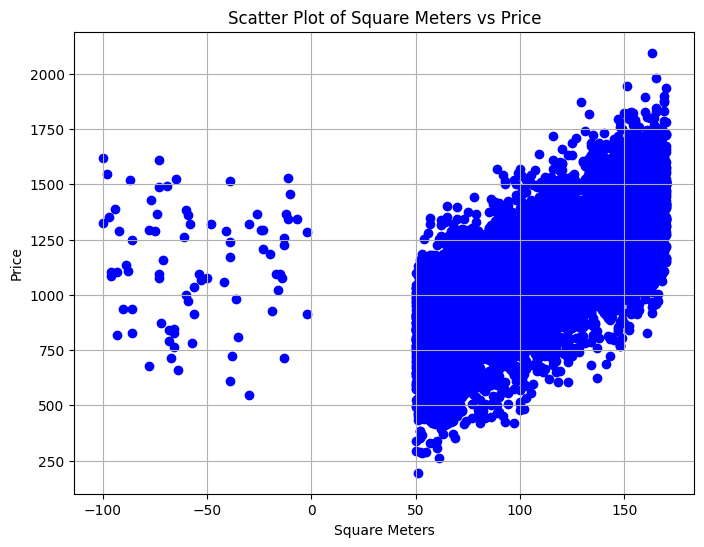

'There are outliers in the dataset, these will be dealt with.'

In [10]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_train['square_meters'], df_train['price'], c='b', marker='o', label='Apartments')

# Set labels and title
plt.xlabel('Square Meters')
plt.ylabel('Price')
plt.title('Scatter Plot of Square Meters vs Price')

# Show the plot
plt.grid(True)
plt.show()

'''
This graph shows the general trend that as the apartment size increases, the price proportionally increases.
There are outliers in the dataset, these will be dealt with.
'''

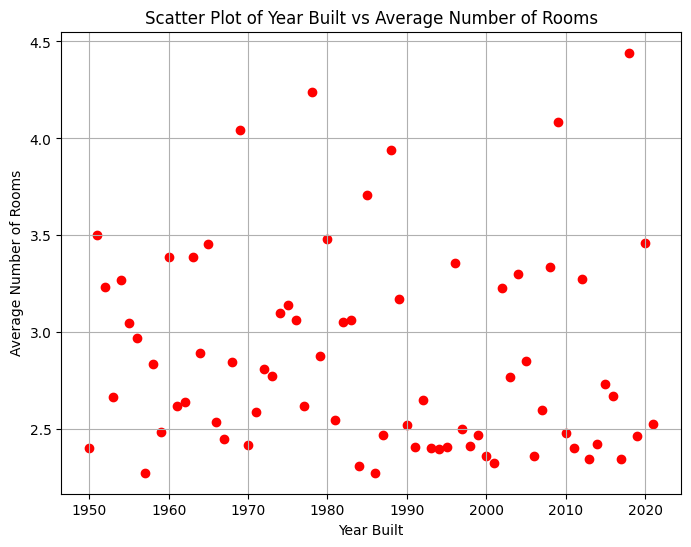

'There is no clear trend between the year built and the average number of rooms. The average number of rooms is generally higher for the older apartments, the next graph will verify if older apartments are bigger in general. '

In [8]:
# Calculate the average (mean) number of rooms for each unique 'year_built' value
average_rooms_by_year = df_train.groupby('year_built')['num_rooms'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(average_rooms_by_year['year_built'], average_rooms_by_year['num_rooms'], c='r', marker='o', label='Apartments')

# Set labels and title
plt.xlabel('Year Built')
plt.ylabel('Average Number of Rooms')
plt.title('Scatter Plot of Year Built vs Average Number of Rooms')

# Show the plot
plt.grid(True)
plt.show()

'''
There is no clear trend between the year built and the average number of rooms.
The average number of rooms is generally higher for the older apartments,
the next graph will verify if older apartments are bigger in general.
'''

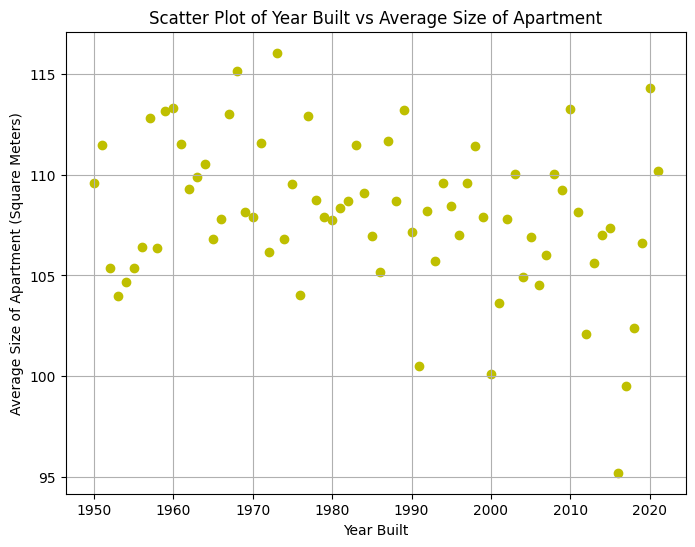

'\nNewer apartments are generally smaller than older apartments.\nThe next graph dive deeper and check if older apartments are on average more expensive expensive.\n'

In [11]:
# Calculate the average (mean) number of rooms for each unique 'year_built' value
average_rooms_by_year = df_train.groupby('year_built')['square_meters'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(average_rooms_by_year['year_built'], average_rooms_by_year['square_meters'], c='y', marker='o', label='Apartments')

# Set labels and title
plt.xlabel('Year Built')
plt.ylabel('Average Size of Apartment (Square Meters)')
plt.title('Scatter Plot of Year Built vs Average Size of Apartment')

# Show the plot
plt.grid(True)
plt.show()

'''
Newer apartments are generally smaller than older apartments.
The next graph dive deeper and check if older apartments are on average more expensive expensive.
'''

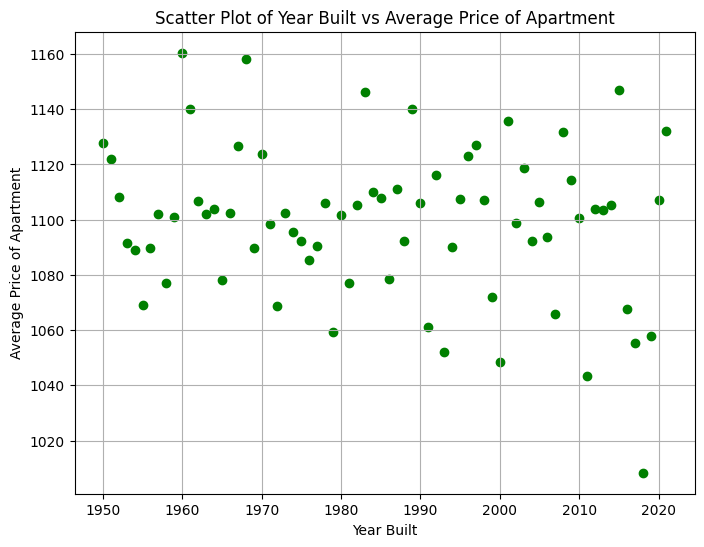

'\nThis graph confirms our suspicions that older apartments are generally more expensive.\nThis is because of their larger size and larger number of rooms. \nWe will now check what effect neighborhood has an impact on the price.\n'

In [12]:
# Calculate the average (mean) number of rooms for each unique 'year_built' value
average_rooms_by_year = df_train.groupby('year_built')['price'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(average_rooms_by_year['year_built'], average_rooms_by_year['price'], c='g', marker='o', label='Apartments')

# Set labels and title
plt.xlabel('Year Built')
plt.ylabel('Average Price of Apartment')
plt.title('Scatter Plot of Year Built vs Average Price of Apartment')

# Show the plot
plt.grid(True)
plt.show()

'''
This graph confirms our suspicions that older apartments are generally more expensive.
This is because of their larger size and larger number of rooms. 
We will now check what effect neighborhood has an impact on the price.
'''

'This graph confirms our suspicions that older apartments are generally more expensive. This is because of their larger size and larger number of rooms. We will now check what effect neighborhood has an impact on the price. '

/var/folders/jp/ccdbvftd4pg2qt6s4b7bkv5m0000gn/T/ipykernel_54409/1348298796.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_price_by_neighborhood, x='neighborhood', y='price', palette='Set2')


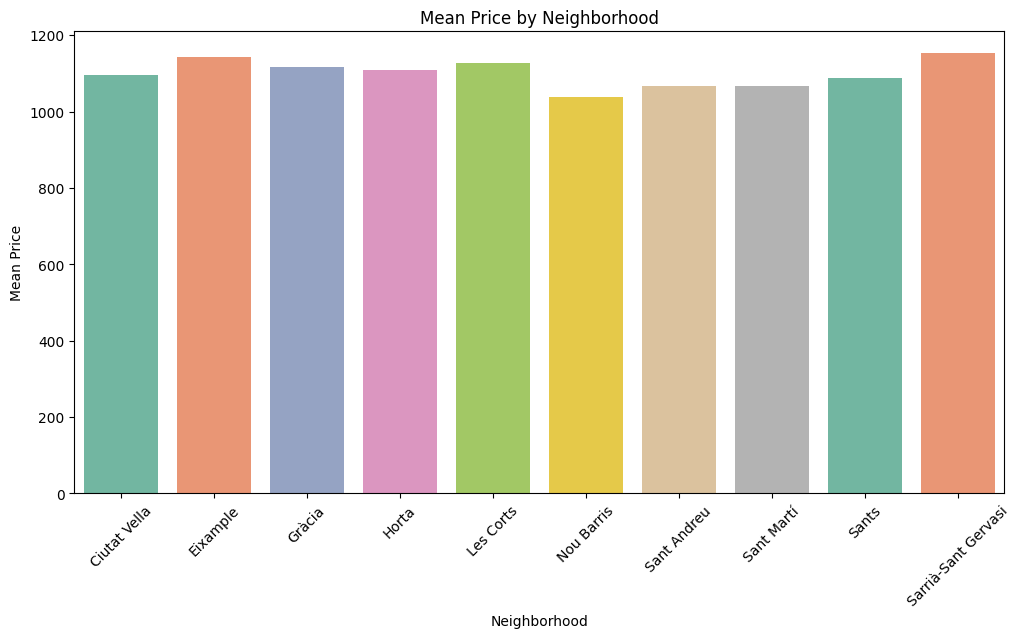

'\nFrom the graph we can see that the most expensive neighborhood is Sarria-Sant Gervasi.\nThe cheapest neighborhood is Nou Barris. We will now check if the number of rooms has an impact on the price.\n'

In [13]:
# Group the DataFrame by 'neighborhood' and calculate the median price for each neighborhood
median_price_by_neighborhood = df_train.groupby('neighborhood')['price'].mean().reset_index()

# Create a bar chart to display the median prices
plt.figure(figsize=(12, 6))
sns.barplot(data=median_price_by_neighborhood, x='neighborhood', y='price', palette='Set2')
plt.title('Mean Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()

'''
From the graph we can see that the most expensive neighborhood is Sarria-Sant Gervasi.
The cheapest neighborhood is Nou Barris. We will now check if the number of rooms has an impact on the price.
'''

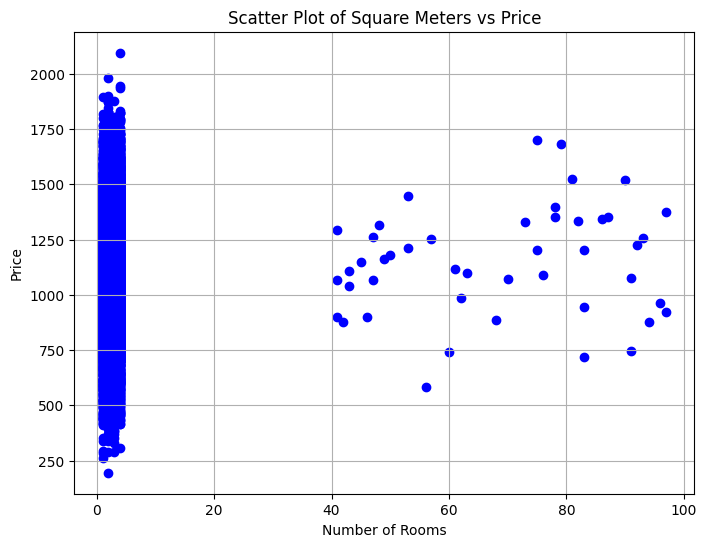

'\nThe outliers impact the ability to infer a trend from this graph.\nIn the Indentify Anomolies and Missing Data section the outliers will be treated.\nThis graph will be reproduced and analysis conducted.\n'

In [14]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_train['num_rooms'], df_train['price'], c='b', marker='o', label='Apartments')

# Set labels and title
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Scatter Plot of Square Meters vs Price')

# Show the plot
plt.grid(True)
plt.show()

'''
The outliers impact the ability to infer a trend from this graph.
In the Indentify Anomalies and Missing Data section the outliers will be treated.
This graph will be reproduced and analysis conducted.
'''

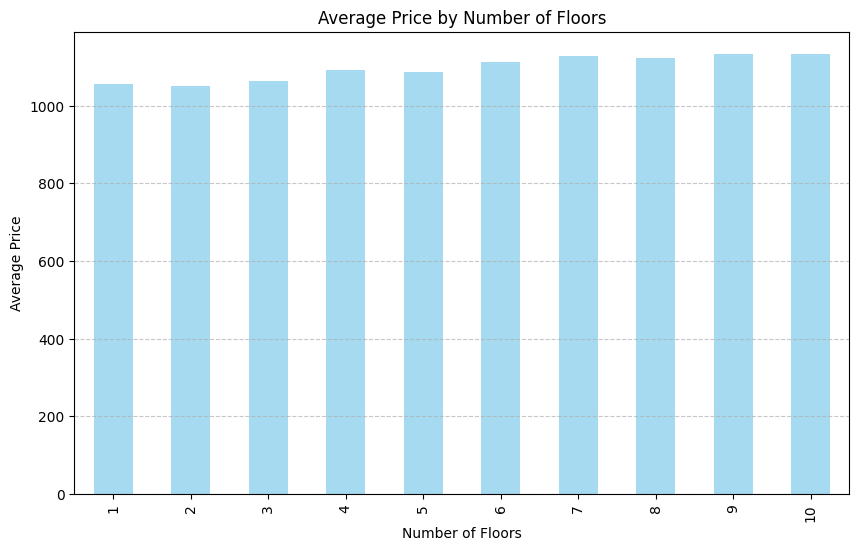

'\nThe price of apartments increases as the number of floors increases.\nWe will now check if the orientation of the apartment has an impact on the price.\n'

In [15]:
# Group the data by 'num_floor' and calculate the average price for each group
avg_price_by_floor = df_train.groupby('num_floor')['price'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_price_by_floor.plot(kind='bar', color='skyblue', alpha=0.75)

# Set labels and title
plt.xlabel('Number of Floors')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Floors')

# Update x-axis ticks to be integers
plt.xticks(range(len(avg_price_by_floor.index)), map(int, avg_price_by_floor.index))

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

'''
The price of apartments increases as the number of floors increases.
We will now check if the orientation of the apartment has an impact on the price.
'''

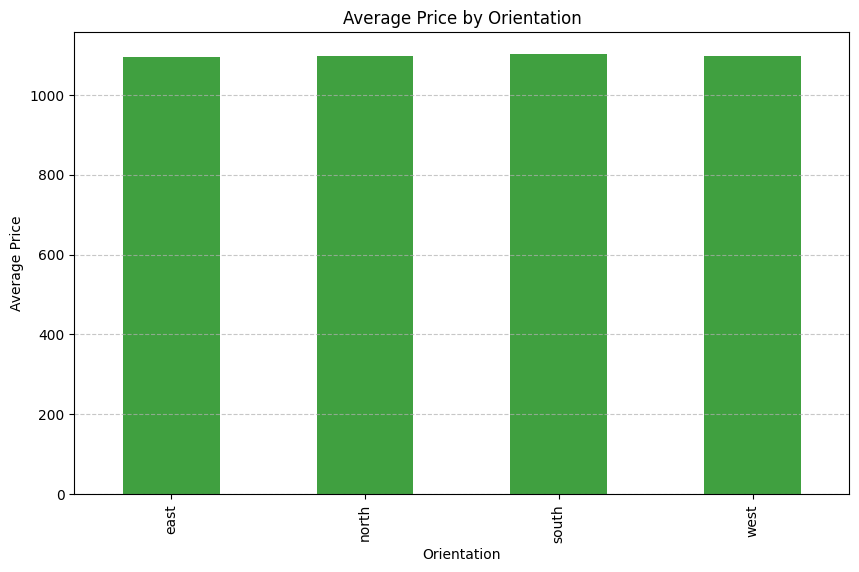

'\nOrientation does not have an impact on the price.\nThis could be down to the number of NaN values in the orientation column.\nThis will be reviewed in the Indentify Anomolies and Missing Data section.\n'

In [16]:
# Group the data by 'orientation' and calculate the average price for each group
avg_price_by_orientation = df_train.groupby('orientation')['price'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
avg_price_by_orientation.plot(kind='bar', color='green', alpha=0.75)

# Set labels and title
plt.xlabel('Orientation')
plt.ylabel('Average Price')
plt.title('Average Price by Orientation')  
plt.xticks(range(len(avg_price_by_orientation.index)), avg_price_by_orientation.index) 

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

'''
Orientation does not have an impact on the price.
This could be down to the number of NaN values in the orientation column.
This will be reviewed in the Indentify Anomolies and Missing Data section.
'''

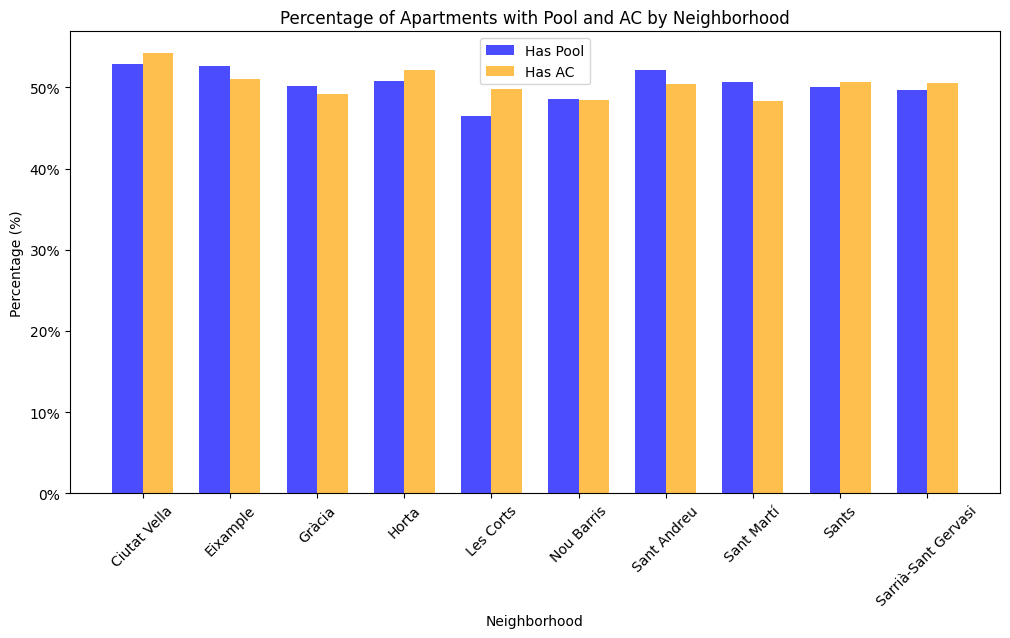

'\n"There is a surprising low percentage of apartments that have AC and a high percentage of apartments have a pool.\nThis could be due to the fact that the data is missing.\nThis will be reviewed in the Indentify Anomolies and Missing Data section.\n'

In [17]:
# Extract data
percentage_with_pool = df_train.groupby('neighborhood')['has_pool'].mean().reset_index()
percentage_with_ac = df_train.groupby('neighborhood')['has_ac'].mean().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(percentage_with_pool))

plt.bar(index, percentage_with_pool['has_pool'], bar_width, label='Has Pool', color='blue', alpha=0.7)
plt.bar(index + bar_width, percentage_with_ac['has_ac'], bar_width, label='Has AC', color='orange', alpha=0.7)

# Set title and labels
plt.title('Percentage of Apartments with Pool and AC by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Percentage (%)')

# Customize the legend
plt.legend()

# Set x-axis labels and rotation
plt.xticks(index + bar_width / 2, percentage_with_pool['neighborhood'], rotation=45)

# Format y-axis tick labels as percentages
from matplotlib.ticker import FuncFormatter

ax = plt.gca()

def to_percentage(y, _):
    return f'{y*100:.0f}%'

ax.yaxis.set_major_formatter(FuncFormatter(to_percentage))

plt.show()

'''
"There is a surprising low percentage of apartments that have AC and a high percentage of apartments have a pool.
This could be due to the fact that the data is missing.
This will be reviewed in the Indentify Anomolies and Missing Data section.
'''


# <span style = 'color:red'> ______________________________________________ </span>

### <span style = "color: #F4E9CD"> IDENTIFY ANOMALIES AND MISSING DATA </span>
### <span style = "color: #F4E9CD"> ____________________________________ </span>

id                     0
num_rooms              0
num_baths            154
square_meters        155
orientation         2299
year_built           167
is_furnished         162
has_pool             150
neighborhood           0
num_crimes           154
has_ac               167
accepts_pets         153
num_supermarkets    6455
price                  0
num_floor            146
num_door             146
dtype: int64


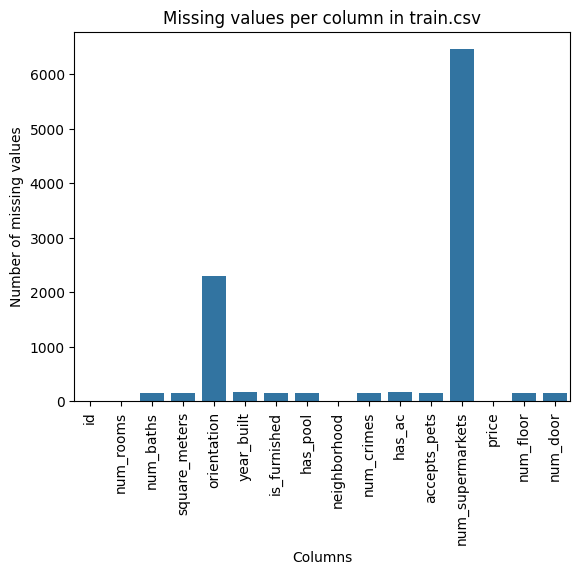

accepts_pets         198.0
has_ac               198.0
has_pool             194.0
id                     0.0
is_furnished         197.0
neighborhood          35.0
num_baths            194.0
num_crimes           194.0
num_door             197.0
num_floor            197.0
num_rooms            191.0
num_supermarkets    8081.0
orientation         2822.0
price                  NaN
square_meters        198.0
year_built           197.0
dtype: float64


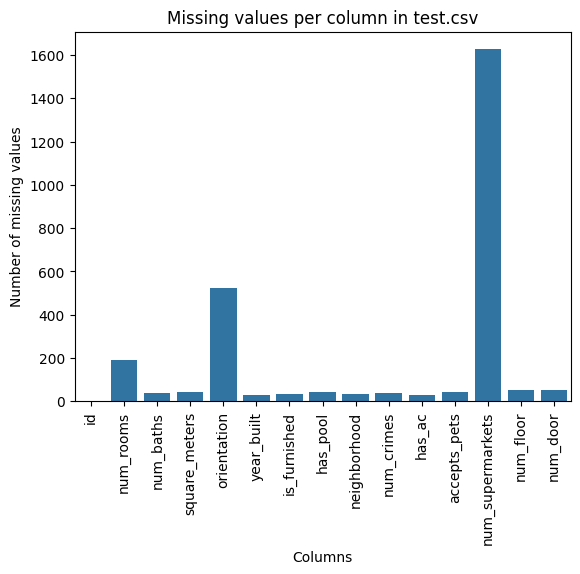

In [22]:
# INVESTIGATE WHETHER THE MISSING VALUES ARE AT RANDOM OR NOT
nas_train = df_train.isnull().sum()
print(nas_train)
sns.barplot(x = nas_train.index, y = nas_train.values)
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.title('Missing values per column in train.csv')
plt.show()

nas_test = df_test.isnull().sum()
print(nas_test + nas_train)
sns.barplot(x = nas_test.index, y = nas_test.values)
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.title('Missing values per column in test.csv')
plt.show()

### <span style = "color: #F4E9CD"> HANDLING NUM_SUPERMARKETS </span>
### <span style = "color: #F4E9CD"> ____________________________________ </span>

In [188]:
print(f"{int(6589*100/8000)} %")

'''
Since column num_supermarkets has more than 80% of missing values, we will drop it.
'''

df_train = df_train.drop(columns = ['num_supermarkets'], axis = 1)
display(df_train)

df_test = df_test.drop(columns = ['num_supermarkets'], axis = 1)
display(df_test)

82 %


,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,num_floor,num_door
0,9255,1.0,1.0,NaN,NaN,1956.0,False,False,Sant Martí,2.0,True,True,1096,3.0,1.0
1,1562,4.0,1.0,133.0,west,1960.0,False,False,Sants,4.0,False,False,1396,7.0,2.0
2,1671,2.0,3.0,137.0,NaN,2000.0,False,True,Eixample,0.0,False,False,1263,1.0,1.0
3,6088,1.0,2.0,-41.0,NaN,2002.0,False,True,Sants,5.0,False,False,1290,6.0,1.0
4,6670,2.0,1.0,70.0,NaN,1979.0,True,False,Gràcia,0.0,False,True,962,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,NaN,95.0,south,2021.0,False,False,Sant Martí,0.0,False,False,1066,9.0,1.0
7996,5192,4.0,3.0,166.0,NaN,1995.0,False,False,Nou Barris,9.0,False,False,1255,9.0,4.0
7997,5391,4.0,1.0,89.0,east,2015.0,True,False,Sant Martí,0.0,True,False,1220,9.0,3.0
7998,861,4.0,2.0,167.0,west,1977.0,False,True,Gràcia,0.0,True,False,1547,8.0,4.0


,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_floor,num_door
0,6253,NaN,1.0,152.0,NaN,2012.0,True,True,Les Corts,0.0,False,False,5.0,4.0
1,4685,NaN,2.0,90.0,east,1957.0,True,False,Ciutat Vella,2.0,False,True,10.0,1.0
2,1732,NaN,2.0,86.0,NaN,1991.0,False,False,Eixample,0.0,False,True,5.0,2.0
3,4743,NaN,3.0,164.0,NaN,2002.0,False,True,Nou Barris,7.0,False,False,8.0,4.0
4,4522,NaN,1.0,99.0,NaN,1984.0,True,True,Sant Andreu,0.0,True,False,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6413,3.0,3.0,95.0,south,1976.0,True,True,Sarrià-Sant Gervasi,0.0,True,True,5.0,2.0
1996,8286,1.0,2.0,161.0,NaN,1984.0,True,False,Nou Barris,9.0,False,False,5.0,1.0
1997,7854,4.0,3.0,111.0,NaN,1957.0,True,True,Gràcia,0.0,False,True,4.0,2.0
1998,1096,2.0,1.0,154.0,north,2018.0,False,False,Nou Barris,7.0,False,False,9.0,1.0


### <span style = "color: #F4E9CD"> TESTING WHETHER MISSING DATA IS MISSING COMPLETELY AT RANDOM </span>
### <span style = "color: #F4E9CD"> ______________________________________________________________ </span>

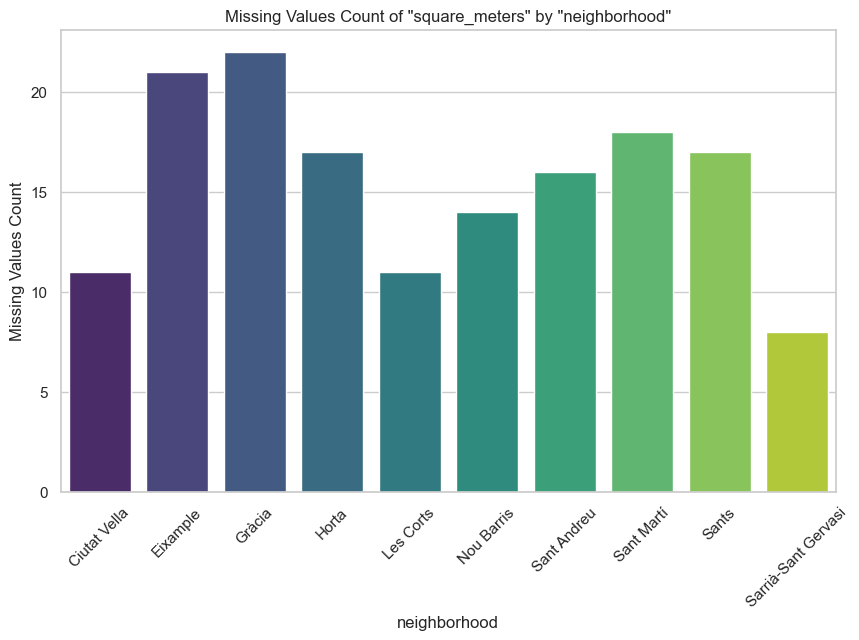

In [143]:
# Filter rows where 'neighborhood' is not missing
df_filtered = df_train.dropna(subset=['neighborhood'])

# Group the filtered DataFrame by values in 'square_meters' and calculate the count of missing values in 'neighborhood'
missing_values_counts = df_filtered.groupby('neighborhood')['square_meters'].apply(lambda x: x.isnull().sum()).reset_index()
missing_values_counts.rename(columns={'square_meters': 'Missing Values Count'}, inplace=True)

# Create a bar plot to display the counts
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_values_counts, x='neighborhood', y='Missing Values Count', hue = 'neighborhood', palette='viridis', legend = False)
plt.title(f'Missing Values Count of "square_meters" by "neighborhood"')
plt.xlabel('neighborhood')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)
plt.show()

p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0
p-value: 1.0


'\nAs we can observe, the missing values are very probably MCAR so we can handle them without too many problems.\nWe will try different systems.\n'

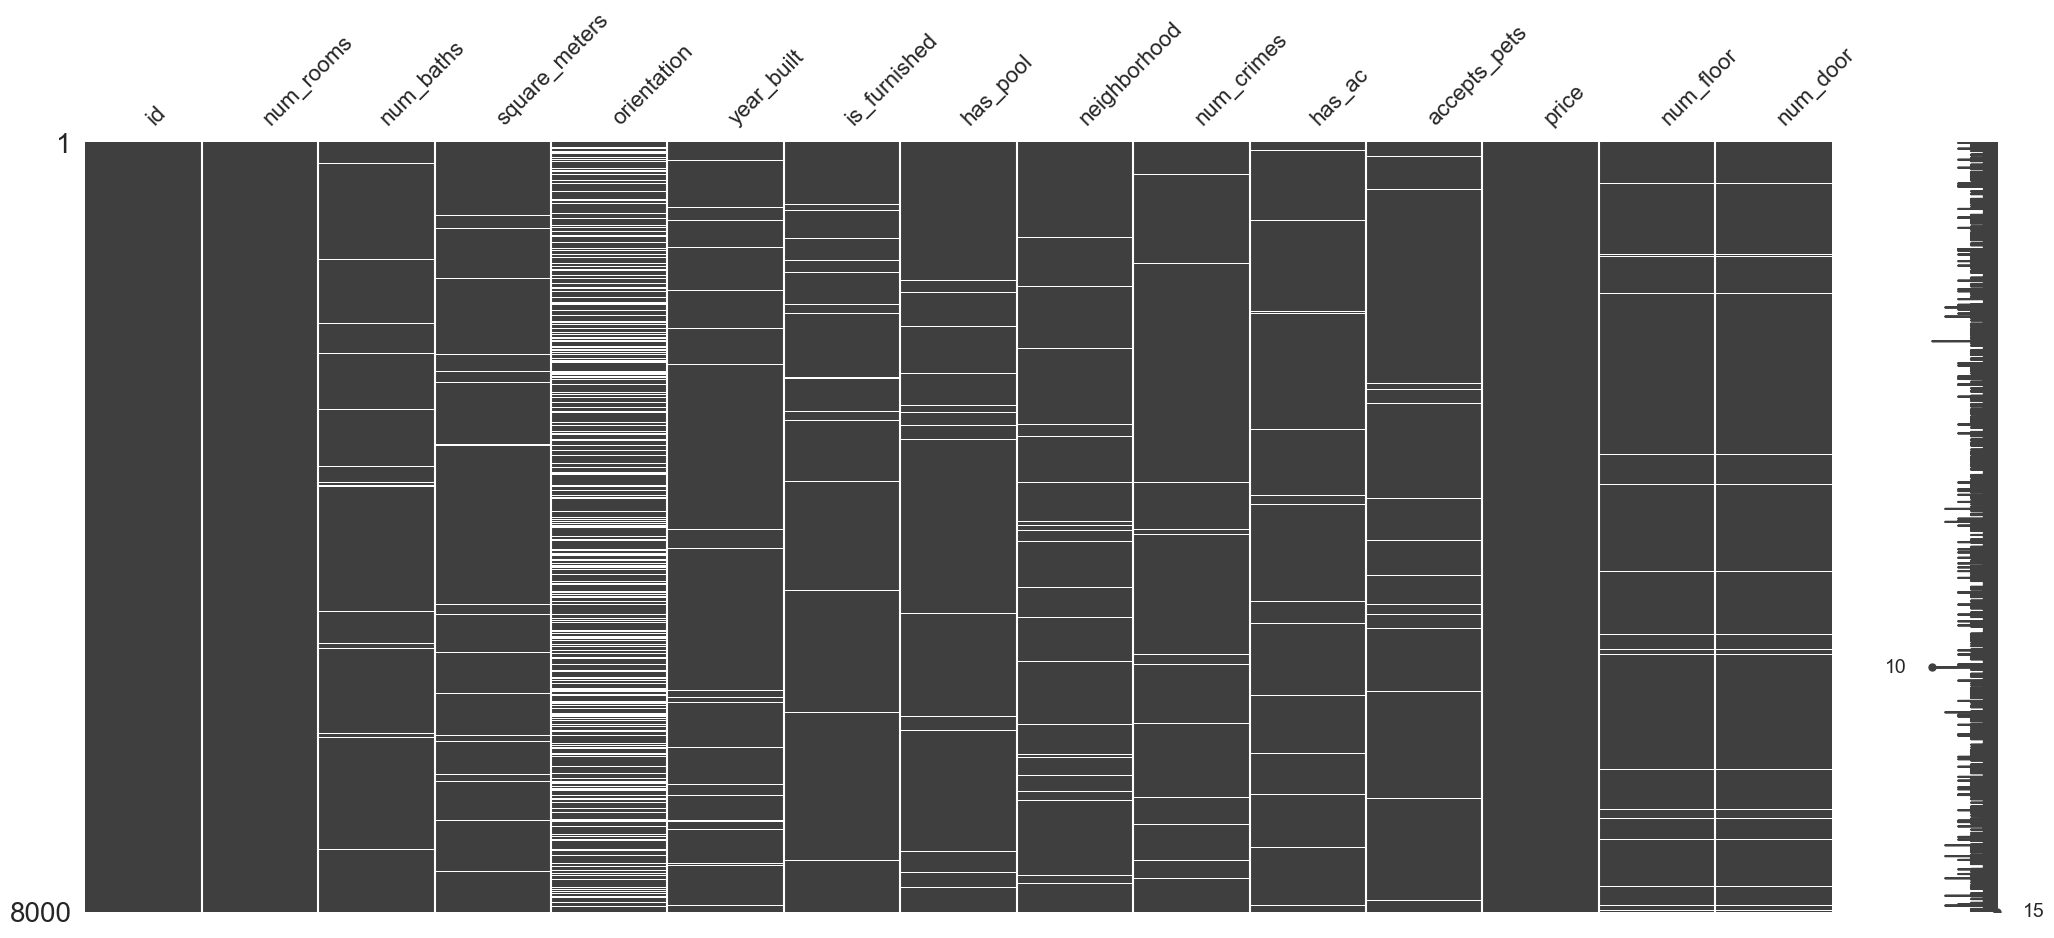

In [189]:
import missingno as msno
from scipy.stats import chi2_contingency

msno.matrix(df_train)

for column in df_train.columns:
    observed = df_train[column].notna().sum() + 0.5 # Count of observed values
    missing = df_train[column].isna().sum() + 0.5    # Count of missing values
    contingency_table = [[observed, missing]]
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f'p-value: {p}')

'''
As we can observe, the missing values are very probably MCAR so we can handle them without too many problems.
We will try different systems.
'''

In [52]:

'''
We start the next section by checking whether the variables are numerical or not
'''
numerical_vars = []
categorical_vars = []

for var in df_train.columns:
    
    
    numerical_bool = ('numerical' if df_train[var].dtype in ['int64', 'float64'] else 'categorical')
    
    if numerical_bool == 'numerical':
        numerical_vars.append(var)
    elif numerical_bool == 'categorical':
        categorical_vars.append(var)
    else:
        print('ERROR')
    
    #print(f"> {var}: is {numerical_bool}")

display(pd.DataFrame({'numerical variables': numerical_vars}, index = range(1, len(numerical_vars)+1)))
display(pd.DataFrame({'categorical variables': categorical_vars}, index = range(1, len(categorical_vars)+1)))

'''
As we can see, right now we have 6 categorical variables:
1. orientation
2. is_furnished
3. has_pool
4. neighborhood
5. has_ac
6. accepts_pets
'''

bool_variables = ['is_furnished',
                    'has_pool',
                    'has_ac',
                    'accepts_pets']

display(bool_variables)

,numerical variables
1,id
2,num_rooms
3,num_baths
4,square_meters
5,year_built
6,num_crimes
7,num_supermarkets
8,price
9,num_floor
10,num_door


,categorical variables
1,orientation
2,is_furnished
3,has_pool
4,neighborhood
5,has_ac
6,accepts_pets


['is_furnished', 'has_pool', 'has_ac', 'accepts_pets']

## <span style = "color: #F96E46"> DATA PRE-PROCESSING </span>
## <span style = "color: #F96E46"> ______________________________________________________________ </span>

### <span style = "color: #F4E9CD"> TRANSFORMATION AND ENCODING OF THE CATEGORICAL VALUES </span>

We wan to turn the booleans into 0 / 1 values (integers as well) instead of having True / False strings.

We also want to one hot encode the categorical variables, both of them, therefore orientation and neighborhood should be turned into 4 and 9 dummy variables each.

In [42]:
'''
In order to treat the missing values, we will use the following methods:
1. We will drop the rows where the variable 'neighborhood' is missing.
2. We will then concatenate the train and test datasets to treat the missing values in the same way.
3. We will treat the outliers that appear in numerical variables.
    Justification for the treatment used can be found below, in the section 'OUTLIER TREATMENT'.
4. We will change the dummy variables to 0/1 instead of False/True.
5. We will Standardize the pertinent variables (numerical variables that are not dummies).
6. We will impute all of the missing values using KNNImputer except for variables 'orientation and 'neighborhood' (and without taking price into account).
7. We will rejoin the main dataset with all the variables imputed and then use those to impute the variables in 'neighborhood'.
8. We will apply OneHotEncoding to the variables 'neighborhood' and 'orientation'.
9. We will then separate the train and test datasets again and rename them to X_train, X_test, y_train. 
10. We will create a new dataset and separate it into Xt_train, Xt_test, yt_train and yt_test (it will be created from the main one and be used to perform cross validation).
'''
# 1.
df_train = df_train.dropna(subset = ['neighborhood'])

# 2.
df_whole = pd.concat([df_train, df_test], axis = 0, ignore_index = True)

# 3.
df_whole['square_meters'] = df_whole['square_meters'].abs()
df_whole.loc[df_whole['num_rooms'] > 12, 'num_rooms'] = np.nan

# 4.
bool_variables = ['is_furnished',
                    'has_pool',
                    'has_ac',
                    'accepts_pets']

for catvar in bool_variables:
    df_whole[catvar] = df_whole[catvar].map({True: 1, False: 0})

display(df_whole)

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,num_floor,num_door
0,9255,1.0,1.0,NaN,NaN,1956.0,0.0,0.0,Sant Martí,2.0,1.0,1.0,NaN,1096.0,3.0,1.0
1,1562,4.0,1.0,133.0,west,1960.0,0.0,0.0,Sants,4.0,0.0,0.0,2.0,1396.0,7.0,2.0
2,1671,2.0,3.0,137.0,NaN,2000.0,0.0,1.0,Eixample,0.0,0.0,0.0,NaN,1263.0,1.0,1.0
3,6088,1.0,2.0,41.0,NaN,2002.0,0.0,1.0,Sants,5.0,0.0,0.0,NaN,1290.0,6.0,1.0
4,6670,2.0,1.0,70.0,NaN,1979.0,1.0,0.0,Gràcia,0.0,0.0,1.0,3.0,962.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,3.0,3.0,95.0,south,1976.0,1.0,1.0,Sarrià-Sant Gervasi,0.0,1.0,1.0,NaN,NaN,5.0,2.0
9831,8286,1.0,2.0,161.0,NaN,1984.0,1.0,0.0,Nou Barris,9.0,0.0,0.0,NaN,NaN,5.0,1.0
9832,7854,4.0,3.0,111.0,NaN,1957.0,1.0,1.0,Gràcia,0.0,0.0,1.0,NaN,NaN,4.0,2.0
9833,1096,2.0,1.0,154.0,north,2018.0,0.0,0.0,Nou Barris,7.0,0.0,0.0,NaN,NaN,9.0,1.0


In [43]:
# 5.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vars_to_scale = [
    'square_meters',
    'num_rooms',
    'num_baths',
    'year_built',
    'num_crimes',
    'num_floor',
    'num_door',
]
df_whole[vars_to_scale] = scaler.fit_transform(df_whole[vars_to_scale])
display(df_whole)

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,num_floor,num_door
0,9255,-1.330886,-1.216409,NaN,NaN,-1.422690,0.0,0.0,Sant Martí,-0.223638,1.0,1.0,NaN,1096.0,-0.909016,-1.330730
1,1562,1.345185,-1.216409,0.673252,west,-1.228787,0.0,0.0,Sants,0.359485,0.0,0.0,2.0,1396.0,0.492984,-0.440127
2,1671,-0.438862,1.235740,0.786283,NaN,0.710249,0.0,1.0,Eixample,-0.806761,0.0,0.0,NaN,1263.0,-1.610016,-1.330730
3,6088,-1.330886,0.009665,-1.926453,NaN,0.807200,0.0,1.0,Sants,0.651046,0.0,0.0,NaN,1290.0,0.142484,-1.330730
4,6670,-0.438862,-1.216409,-1.106981,NaN,-0.307745,1.0,0.0,Gràcia,-0.806761,0.0,1.0,3.0,962.0,-0.208016,-1.330730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,0.453161,1.235740,-0.400539,south,-0.453173,1.0,1.0,Sarrià-Sant Gervasi,-0.806761,1.0,1.0,NaN,NaN,-0.208016,-0.440127
9831,8286,-1.330886,0.009665,1.464467,NaN,-0.065365,1.0,0.0,Nou Barris,1.817292,0.0,0.0,NaN,NaN,-0.208016,-1.330730
9832,7854,1.345185,1.235740,0.051583,NaN,-1.374214,1.0,1.0,Gràcia,-0.806761,0.0,1.0,NaN,NaN,-0.558516,-0.440127
9833,1096,-0.438862,-1.216409,1.266663,north,1.582814,0.0,0.0,Nou Barris,1.234169,0.0,0.0,NaN,NaN,1.193984,-1.330730


In [44]:
# 6.
from sklearn.impute import KNNImputer

df_whole_impute = df_whole.copy()
df_whole_impute = df_whole_impute.drop(columns = ['id', 'orientation', 'neighborhood', 'price'], axis = 1)
#display(df_whole_impute)

knn_imputer = KNNImputer(n_neighbors = 25, missing_values = np.nan)
imputed_data = knn_imputer.fit_transform(df_whole_impute)
imputed_df = pd.DataFrame(imputed_data, columns = df_whole_impute.columns)
df_whole_impute = imputed_df
df_whole_impute[bool_variables] = df_whole_impute[bool_variables].round(0).astype('int64')

#display(df_whole)
#display(df_whole_impute)
print(df_whole['is_furnished'].isna().sum())
print(df_whole['is_furnished'].sum())
print(df_whole_impute['is_furnished'].sum())

for catvar in bool_variables:
    print((df_whole_impute[catvar] == df_whole[catvar]).sum() == 9835 - (nas_train + nas_test)[catvar])

197
4681.0
4770
True
True
True
True


In [45]:
# 7.
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

common_cols = df_whole.columns.intersection(df_whole_impute.columns)
df_whole[common_cols] = df_whole_impute[common_cols]


'''
for var in df_whole.columns:
    
    print(f"> {var}: {df_whole[var].isna().sum()} missing values")
'''

df_neigh_impute = df_whole.copy()
df_neigh_impute = df_neigh_impute.drop(columns = ['id', 'orientation', 'price'], axis = 1)

#display(df_whole[df_whole['id'] == 8572])

list_of_neigh = df_neigh_impute['neighborhood'].unique()
list_of_neigh = list_of_neigh.tolist()
list_of_neigh.remove(np.nan)
#display(list_of_neigh, len(list_of_neigh))

mapping = {}

for i in range(len(list_of_neigh)):
    mapping[list_of_neigh[i]] = range(len(list_of_neigh))[i] + 1

rev_mapping = {value: key for key, value in mapping.items()}
#display(mapping, rev_mapping)

df_neigh_impute['neighborhood'] = df_neigh_impute['neighborhood'].map(mapping)

#labeler = LabelEncoder()
#labeler.fit(df_neigh_impute['neighborhood'])
#df_neigh_impute['neighborhood'] = labeler.transform(df_neigh_impute['neighborhood'])
#display(df_neigh_impute)
#display(df_neigh_impute.loc[7757])

knn_imputer = KNNImputer(n_neighbors = 25)
imputed_data = knn_imputer.fit_transform(df_neigh_impute)
imputed_df = pd.DataFrame(imputed_data, columns = df_neigh_impute.columns)
df_neigh_impute['neighborhood'] = imputed_df['neighborhood'].round(0)

#display(df_neigh_impute.loc[7757])
#df_neigh_impute['neighborhood'] = labeler.inverse_transform(df_neigh_impute['neighborhood'].astype(int))

df_neigh_impute['neighborhood'] = df_neigh_impute['neighborhood'].map(rev_mapping)

print((df_whole['neighborhood'] == df_neigh_impute['neighborhood']).sum())

df_whole['neighborhood'] = df_neigh_impute['neighborhood']


for var in df_whole.columns:
    
    print(f"> {var}: {df_whole[var].isna().sum()} missing values")


#display(df_whole[df_whole['neighborhood'].isna()])

display(df_whole)
display(df_neigh_impute)

for col in df_neigh_impute.columns:
    print((df_whole[col] == df_neigh_impute[col]).sum())

9800
> id: 0 missing values
> num_rooms: 0 missing values
> num_baths: 0 missing values
> square_meters: 0 missing values
> orientation: 2822 missing values
> year_built: 0 missing values
> is_furnished: 0 missing values
> has_pool: 0 missing values
> neighborhood: 0 missing values
> num_crimes: 0 missing values
> has_ac: 0 missing values
> accepts_pets: 0 missing values
> num_supermarkets: 0 missing values
> price: 2000 missing values
> num_floor: 0 missing values
> num_door: 0 missing values


,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,num_floor,num_door
0,9255,-1.330886,-1.216409,0.077580,NaN,-1.422690,0,0,Sant Martí,-0.223638,1,1,1.88,1096.0,-0.909016,-1.330730
1,1562,1.345185,-1.216409,0.673252,west,-1.228787,0,0,Sants,0.359485,0,0,2.00,1396.0,0.492984,-0.440127
2,1671,-0.438862,1.235740,0.786283,NaN,0.710249,0,1,Eixample,-0.806761,0,0,2.16,1263.0,-1.610016,-1.330730
3,6088,-1.330886,0.009665,-1.926453,NaN,0.807200,0,1,Sants,0.651046,0,0,2.04,1290.0,0.142484,-1.330730
4,6670,-0.438862,-1.216409,-1.106981,NaN,-0.307745,1,0,Gràcia,-0.806761,0,1,3.00,962.0,-0.208016,-1.330730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,0.453161,1.235740,-0.400539,south,-0.453173,1,1,Sarrià-Sant Gervasi,-0.806761,1,1,1.96,NaN,-0.208016,-0.440127
9831,8286,-1.330886,0.009665,1.464467,NaN,-0.065365,1,0,Nou Barris,1.817292,0,0,1.96,NaN,-0.208016,-1.330730
9832,7854,1.345185,1.235740,0.051583,NaN,-1.374214,1,1,Gràcia,-0.806761,0,1,2.24,NaN,-0.558516,-0.440127
9833,1096,-0.438862,-1.216409,1.266663,north,1.582814,0,0,Nou Barris,1.234169,0,0,2.24,NaN,1.193984,-1.330730


,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,num_floor,num_door
0,-1.330886,-1.216409,0.077580,-1.422690,0,0,Sant Martí,-0.223638,1,1,1.88,-0.909016,-1.330730
1,1.345185,-1.216409,0.673252,-1.228787,0,0,Sants,0.359485,0,0,2.00,0.492984,-0.440127
2,-0.438862,1.235740,0.786283,0.710249,0,1,Eixample,-0.806761,0,0,2.16,-1.610016,-1.330730
3,-1.330886,0.009665,-1.926453,0.807200,0,1,Sants,0.651046,0,0,2.04,0.142484,-1.330730
4,-0.438862,-1.216409,-1.106981,-0.307745,1,0,Gràcia,-0.806761,0,1,3.00,-0.208016,-1.330730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0.453161,1.235740,-0.400539,-0.453173,1,1,Sarrià-Sant Gervasi,-0.806761,1,1,1.96,-0.208016,-0.440127
9831,-1.330886,0.009665,1.464467,-0.065365,1,0,Nou Barris,1.817292,0,0,1.96,-0.208016,-1.330730
9832,1.345185,1.235740,0.051583,-1.374214,1,1,Gràcia,-0.806761,0,1,2.24,-0.558516,-0.440127
9833,-0.438862,-1.216409,1.266663,1.582814,0,0,Nou Barris,1.234169,0,0,2.24,1.193984,-1.330730


9835
9835
9835
9835
9835
9835
9835
9835
9835
9835
9835
9835
9835


In [47]:
# 8.
from sklearn.preprocessing import OneHotEncoder 

def OHencoder(data, list_of_columns):
    encoder = OneHotEncoder(handle_unknown = 'ignore')
    encoded_data = encoder.fit_transform(data[[list_of_columns]]).toarray()
    encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out([list_of_columns]), index = data.index)
    encoded_df = pd.concat([data, encoded_df], axis = 1)
    
    return encoded_df

df_whole = OHencoder(df_whole, 'neighborhood')
df_whole = OHencoder(df_whole, 'orientation')
df_whole = df_whole.drop(columns = ['orientation_nan', 'orientation', 'neighborhood'])

display(df_whole)

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,...,neighborhood_Les Corts,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants,neighborhood_Sarrià-Sant Gervasi,orientation_east,orientation_north,orientation_south,orientation_west
0,9255,-1.330886,-1.216409,0.077580,-1.422690,0,0,-0.223638,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1562,1.345185,-1.216409,0.673252,-1.228787,0,0,0.359485,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1671,-0.438862,1.235740,0.786283,0.710249,0,1,-0.806761,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6088,-1.330886,0.009665,-1.926453,0.807200,0,1,0.651046,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,6670,-0.438862,-1.216409,-1.106981,-0.307745,1,0,-0.806761,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,0.453161,1.235740,-0.400539,-0.453173,1,1,-0.806761,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9831,8286,-1.330886,0.009665,1.464467,-0.065365,1,0,1.817292,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9832,7854,1.345185,1.235740,0.051583,-1.374214,1,1,-0.806761,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9833,1096,-0.438862,-1.216409,1.266663,1.582814,0,0,1.234169,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
# 9.
X_train = df_whole.loc[df_whole['id'].isin(df_train['id'])]
X_train = X_train.drop(columns = ['price'], axis = 1)

y_train = df_whole.loc[df_whole['id'].isin(df_train['id'])][['id', 'price']]
#y_train = y_train

X_test = df_whole.loc[df_whole['id'].isin(df_test['id'])]
X_test = X_test.drop(columns = ['price'], axis = 1)

#display(X_train, y_train, X_test)
#print('neighborhood' in X_train.columns, 'orientation.nan' in X_test.columns)

In [49]:
# 10.
from sklearn.model_selection import train_test_split

Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 168)

display(Xt_train, Xt_test, yt_train, yt_test)

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,...,neighborhood_Les Corts,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants,neighborhood_Sarrià-Sant Gervasi,orientation_east,orientation_north,orientation_south,orientation_west
1577,550,0.453161,-1.216409,0.164614,1.437387,0,0,-0.806761,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4790,8551,-1.330886,1.235740,1.634013,1.582814,1,0,0.067923,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4572,2835,0.453161,0.009665,-0.965693,1.631290,1,1,0.067923,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6825,8478,-0.438862,0.009665,-0.259251,-0.695552,1,1,-0.806761,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5988,4074,-1.330886,-1.216409,-0.852662,-0.065365,1,0,1.525730,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3511,196,-0.438862,-1.216409,-0.344024,0.807200,1,1,1.525730,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,6878,0.453161,1.235740,-0.372282,-0.598600,1,0,2.108853,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3385,8904,-1.330886,-1.216409,-0.287509,-0.274781,0,0,1.234169,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5375,8739,0.453161,-1.216409,-1.530846,0.807200,0,1,-0.806761,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,...,neighborhood_Les Corts,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants,neighborhood_Sarrià-Sant Gervasi,orientation_east,orientation_north,orientation_south,orientation_west
5288,4625,-1.330886,-1.216409,-0.626601,-0.598600,0,0,-0.223638,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7055,4633,-0.438862,0.009665,-1.389558,0.952628,0,0,1.817292,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6183,5253,-1.330886,1.235740,0.842798,0.080062,1,1,2.108853,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2194,6568,0.453161,0.009665,-0.174478,1.146532,1,1,2.108853,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5683,2197,0.453161,0.009665,-0.061447,-0.840980,1,1,-0.806761,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,5725,-1.330886,0.009665,0.079841,-1.713545,1,0,0.067923,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97,6999,-1.330886,1.235740,-1.050466,0.177014,1,0,-0.806761,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
685,4030,-0.438862,-1.216409,-1.333042,-0.986407,0,1,-0.806761,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6425,6060,0.453161,0.009665,-0.146220,1.049580,1,1,-0.806761,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,id,price
1577,550,1264.0
4790,8551,1506.0
4572,2835,1022.0
6825,8478,964.0
5988,4074,679.0
...,...,...
3511,196,636.0
2349,6878,940.0
3385,8904,895.0
5375,8739,852.0


,id,price
5288,4625,1019.0
7055,4633,828.0
6183,5253,1318.0
2194,6568,867.0
5683,2197,1297.0
...,...,...
6292,5725,939.0
97,6999,786.0
685,4030,681.0
6425,6060,951.0



# <span style = 'color: red'> __________________________________________________ </span>

In [ ]:
''' NOT IN USE ANYMORE

from sklearn.preprocessing import OneHotEncoder


Before applying the one hot encoding, we will handle the missing values from the variable 'neighborhood'.
We will drop the rows with missing values in the feature because there are only 165 of them and we have 8000 rows in total.
We also think it's relevant to drop those rows because the variable 'neighborhood' is a variable that we believe will have 
a big impact on the price of the houses. After that we will apply the one hot encoding.


df_test['neighborhood'] = df_test['neighborhood'].fillna(method = 'ffill')

df_train = df_train.dropna(subset = ['neighborhood'])
display(df_train)

def OHencoder(data, list_of_columns):
    encoder = OneHotEncoder(handle_unknown = 'ignore')
    encoded_data = encoder.fit_transform(data[[list_of_columns]]).toarray()
    encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out([list_of_columns]), index = data.index)
    encoded_df = pd.concat([data, encoded_df], axis = 1)
    
    return encoded_df

df_train = OHencoder(df_train, 'neighborhood')
df_train = OHencoder(df_train, 'orientation')
df_train = df_train.drop(columns = ['orientation_nan', 'orientation', 'neighborhood'])
display(df_train)

df_test = OHencoder(df_test, 'neighborhood')
df_test = OHencoder(df_test, 'orientation')
df_test = df_test.drop(columns = ['orientation_nan', 'orientation', 'neighborhood'])

#print(df_test['neighborhood'].isna().sum())
'''

In [ ]:
''' NOT IN USE ANYMORE
Now that the one hot encoding is done and the missing values of 'neighborhood' and 'orientation' are handled,
We will turn the other categorical variables into dummy variables.


# First we create a list with all the categorical boolean variables

bool_variables = ['is_furnished',
                    'has_pool',
                    'has_ac',
                    'accepts_pets']

print(bool_variables)


Check that the mapping works fine, commented due to the fact that it's not necessary anymore, it already worked fine.

df_train_check = df_train

for catvar in bool_variables:
    df_train_check[catvar] = df_train[catvar].map({True: 1, False: 0})
    print(df_train_check[catvar].map({1: True, 0: False}).sum() == df_train[catvar].sum())


for catvar in bool_variables:
    df_train[catvar] = df_train[catvar].map({True: 1, False: 0})

for catvar in bool_variables:
    df_test[catvar] = df_test[catvar].map({True: 1, False: 0})

display(df_train.head())

for catvar in bool_variables:
    print(f"> {catvar}: {df_train[catvar].isna().sum()} missing values")

'''

### <span style = "color: #F4E9CD"> CORRELATION MATRIX </span>
### <span style = "color: #F4E9CD"> ______________________________________________________________ </span>


price                               1.000000
square_meters                       0.699584
num_floor                           0.104368
num_rooms                           0.071166
neighborhood_Sarrià-Sant Gervasi    0.062878
neighborhood_Eixample               0.053185
neighborhood_Les Corts              0.032882
num_baths                           0.026075
neighborhood_Gràcia                 0.021519
is_furnished                        0.014558
neighborhood_Horta                  0.009948
id                                  0.008370
orientation_south                   0.004404
has_pool                            0.002418
num_supermarkets                    0.001483
orientation_west                   -0.000666
neighborhood_Ciutat Vella          -0.004603
has_ac                             -0.008256
orientation_north                  -0.008467
orientation_east                   -0.010755
accepts_pets                       -0.011673
neighborhood_Sants                 -0.015055
year_built

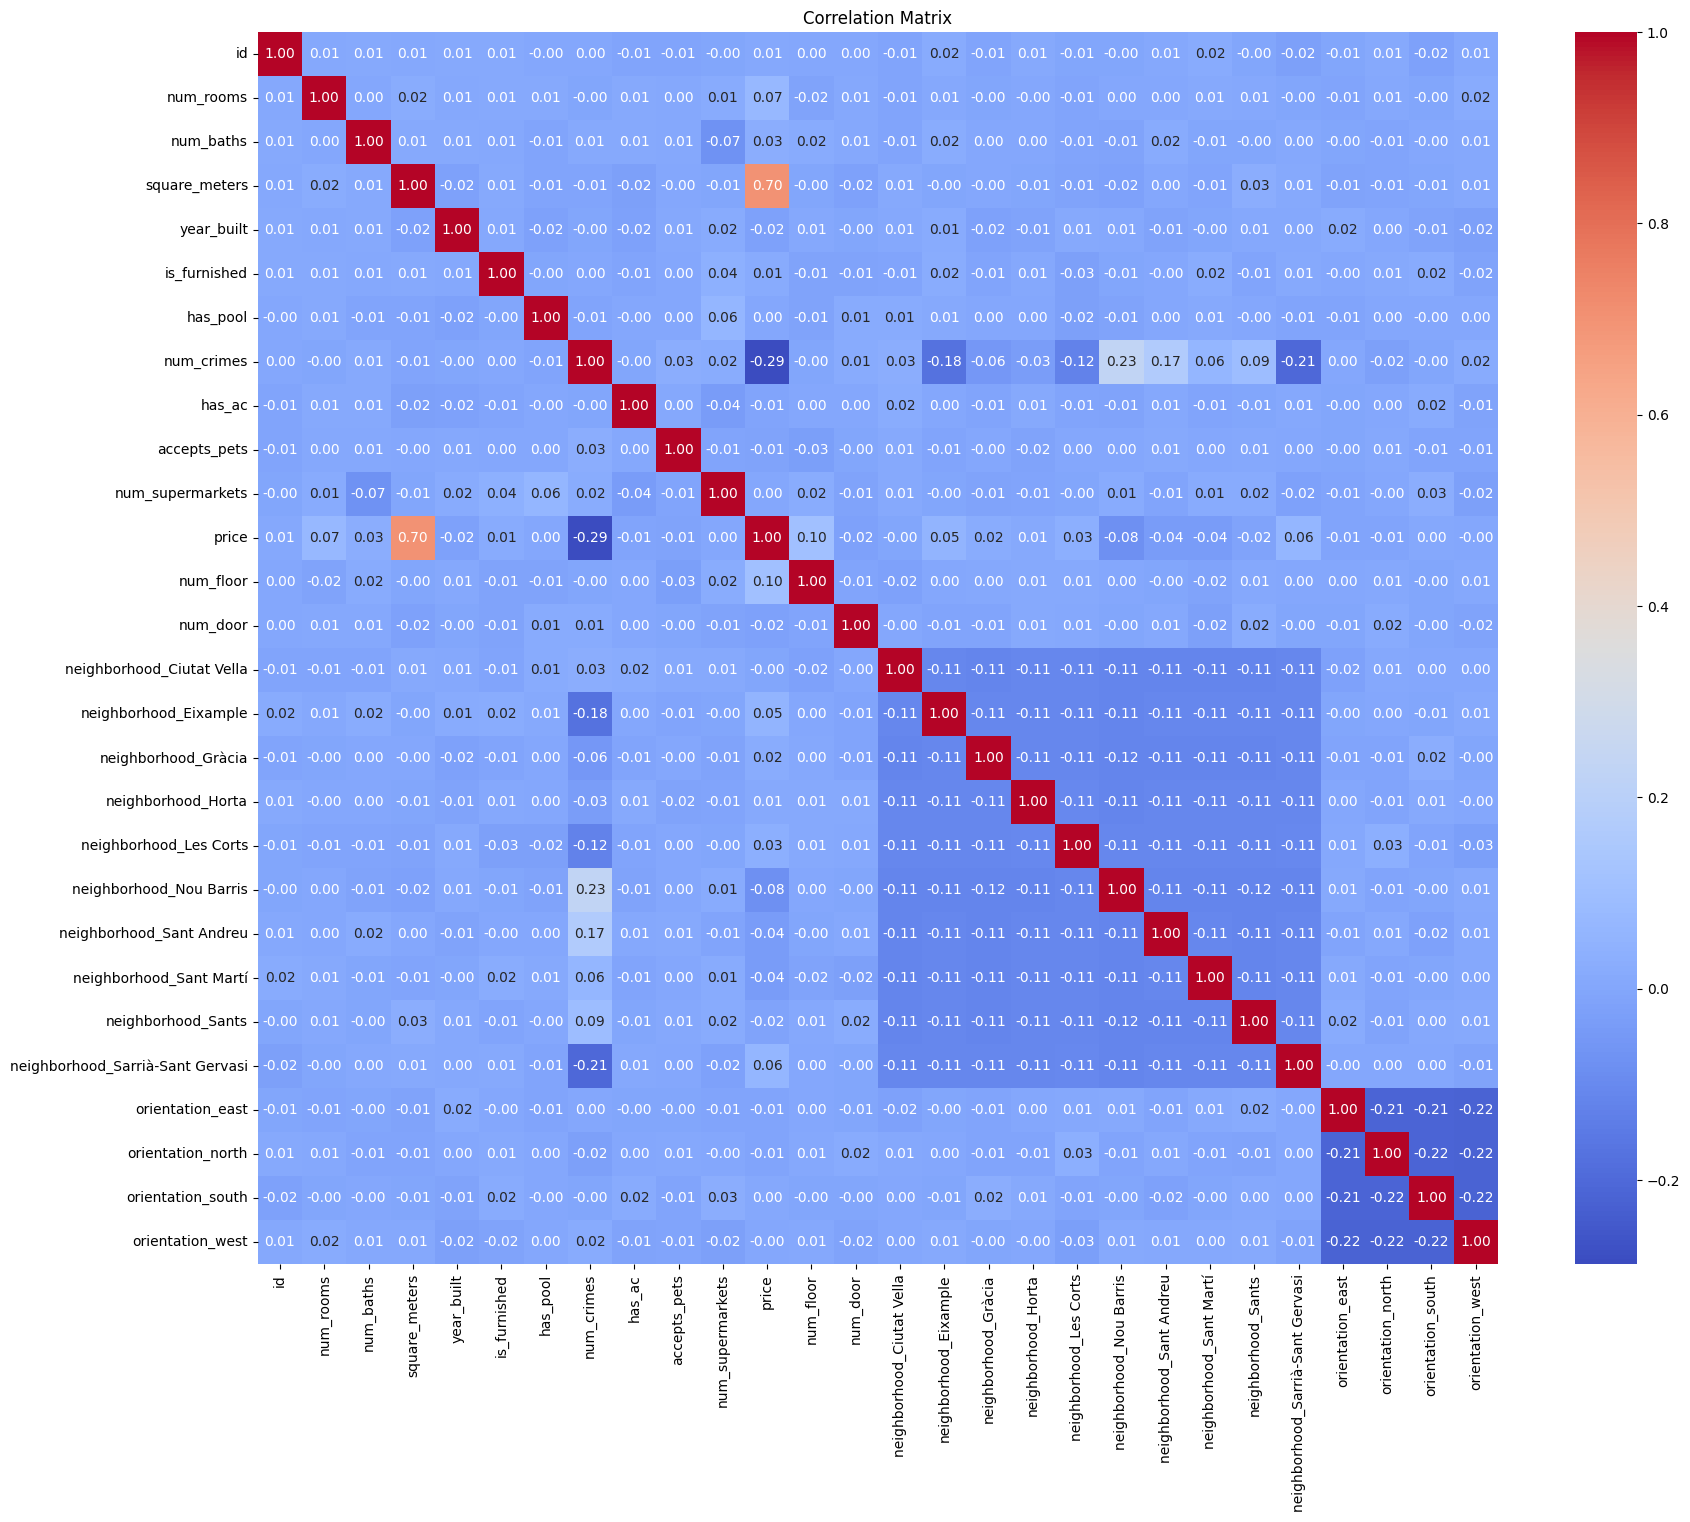

In [54]:
correlation_matrix = df_whole.corr(numeric_only = True)

print(correlation_matrix['price'].sort_values(ascending = False))

# Set up the figure size
plt.figure(figsize=(20, 16))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Add labels and title
plt.title("Correlation Matrix")
plt.show()


### <span style = "color: #F4E9CD"> NOT IN USE ANYMORE </span>
<span style = "color: #F4E9CD"> FUNCTIONS FOR HANDLING MISSING DATA IN GENERAL </span>
### <span style = "color: #F4E9CD"> ______________________________________________________________ </span>


We will firstly define the functions to deal with missing data in the different ways in order to be able to quickly switch from one method to the other.

In [ ]:
''' NOT IN USE ANYMORE

test_data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [6, np.nan, 8, 9, 10],
    'C': [11, 12, 13, np.nan, 15]
}

test_df = pd.DataFrame(test_data)

def mean_imputer(data, list_of_cols):
    data[list_of_cols] = data[list_of_cols].fillna(data[list_of_cols].mean())

#mean_imputer(test_df, ['A', 'C'])
#display(test_df)

def fwdfill_imputer(data, list_of_cols):
    data[list_of_cols] = data[list_of_cols].fillna(method = 'ffill')

#fwdfill_imputer(test_df, ['A', 'C'])
#display(test_df)

def bwdfill_imputer(data, list_of_cols):
    data[list_of_cols] = data[list_of_cols].fillna(method = 'bfill')

#bwdfill_imputer(test_df, ['A', 'C'])
#display(test_df)

test_data = {
    'A': [2, 5, np.nan, 10, 15],
    'B': [26, np.nan, 18, 90, 170],
    'C': [11, 22, 33, np.nan, 75]
}

test_df = pd.DataFrame(test_data)

def knn_imputer(data, list_of_cols):
    from sklearn.impute import KNNImputer
    
    imputer = KNNImputer(n_neighbors = 100)
    imputed_data = imputer.fit_transform(data)
    imputed_df = pd.DataFrame(imputed_data, columns = data.columns)
    data[list_of_cols] = imputed_df[list_of_cols]

list_cols = ['A', 'C']
knn_imputer(test_df, list_cols)
display(test_df)

'''

### <span style = "color: #F4E9CD"> OUTLIER TREATMENT </span>
### <span style = "color: #F4E9CD"> ______________________________________________________________ </span>

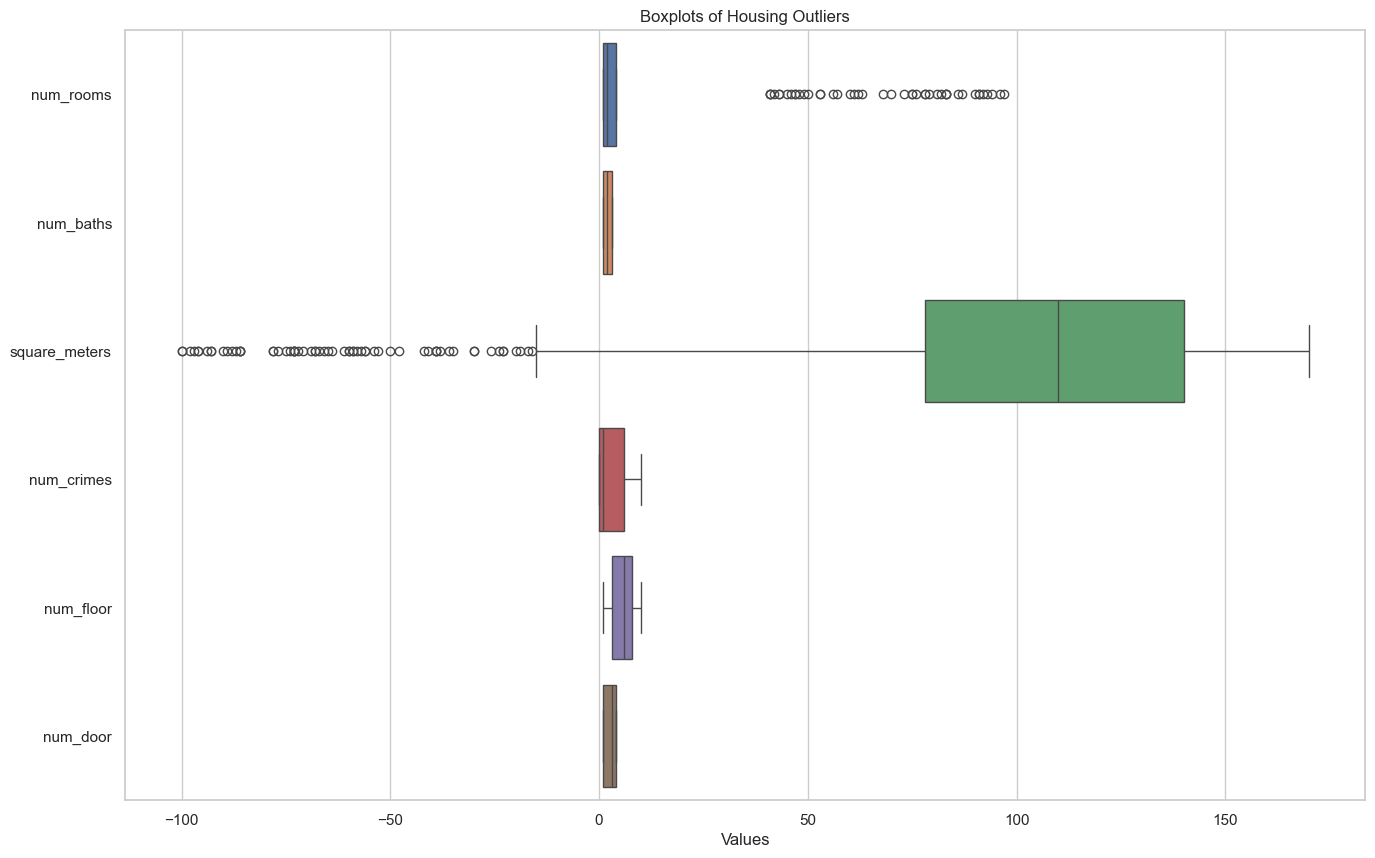

In [55]:
# Create a matrix of boxplots using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))  # Adjust the figsize as needed

# Specify the columns you want to create boxplots for
columns_to_plot = ['num_rooms', 'num_baths', 'square_meters', 
                    'num_crimes',
                    'num_floor', 'num_door']

# Create the matrix of boxplots
sns.boxplot(data=df_train[columns_to_plot], orient="h")

# Customize the appearance or layout as needed
plt.title("Boxplots of Housing Outliers")
plt.xlabel("Values")
plt.show()


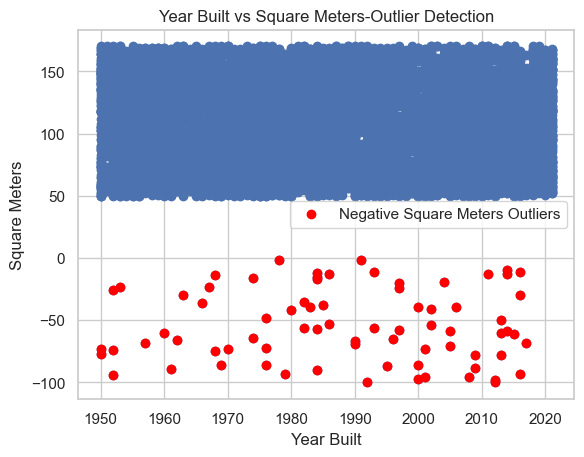

In [56]:
#drill into square_meters data
plt.scatter(df_train['year_built'], df_train['square_meters'])

outliers = df_train[df_train['square_meters'] < 0]
plt.scatter(outliers['year_built'], outliers['square_meters'], color='red', label='Negative Square Meters Outliers')

# Label  axes and add a title
plt.xlabel('Year Built')
plt.ylabel('Square Meters')
plt.title('Year Built vs Square Meters-Outlier Detection')

plt.legend()

# Show the plot
plt.show()


count    7680.000000
mean      109.195833
std        35.378362
min         2.000000
25%        79.000000
50%       110.000000
75%       140.000000
max       170.000000
Name: square_meters, dtype: float64


,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,num_floor,num_door
0,9255,1.0,1.0,NaN,NaN,1956.0,False,False,Sant Martí,2.0,True,True,NaN,1096,3.0,1.0
1,1562,4.0,1.0,133.0,west,1960.0,False,False,Sants,4.0,False,False,2.0,1396,7.0,2.0
2,1671,2.0,3.0,137.0,NaN,2000.0,False,True,Eixample,0.0,False,False,NaN,1263,1.0,1.0
3,6088,1.0,2.0,41.0,NaN,2002.0,False,True,Sants,5.0,False,False,NaN,1290,6.0,1.0
4,6670,2.0,1.0,70.0,NaN,1979.0,True,False,Gràcia,0.0,False,True,3.0,962,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,NaN,95.0,south,2021.0,False,False,Sant Martí,0.0,False,False,NaN,1066,9.0,1.0
7996,5192,4.0,3.0,166.0,NaN,1995.0,False,False,Nou Barris,9.0,False,False,NaN,1255,9.0,4.0
7997,5391,4.0,1.0,89.0,east,2015.0,True,False,Sant Martí,0.0,True,False,1.0,1220,9.0,3.0
7998,861,4.0,2.0,167.0,west,1977.0,False,True,Gràcia,0.0,True,False,NaN,1547,8.0,4.0


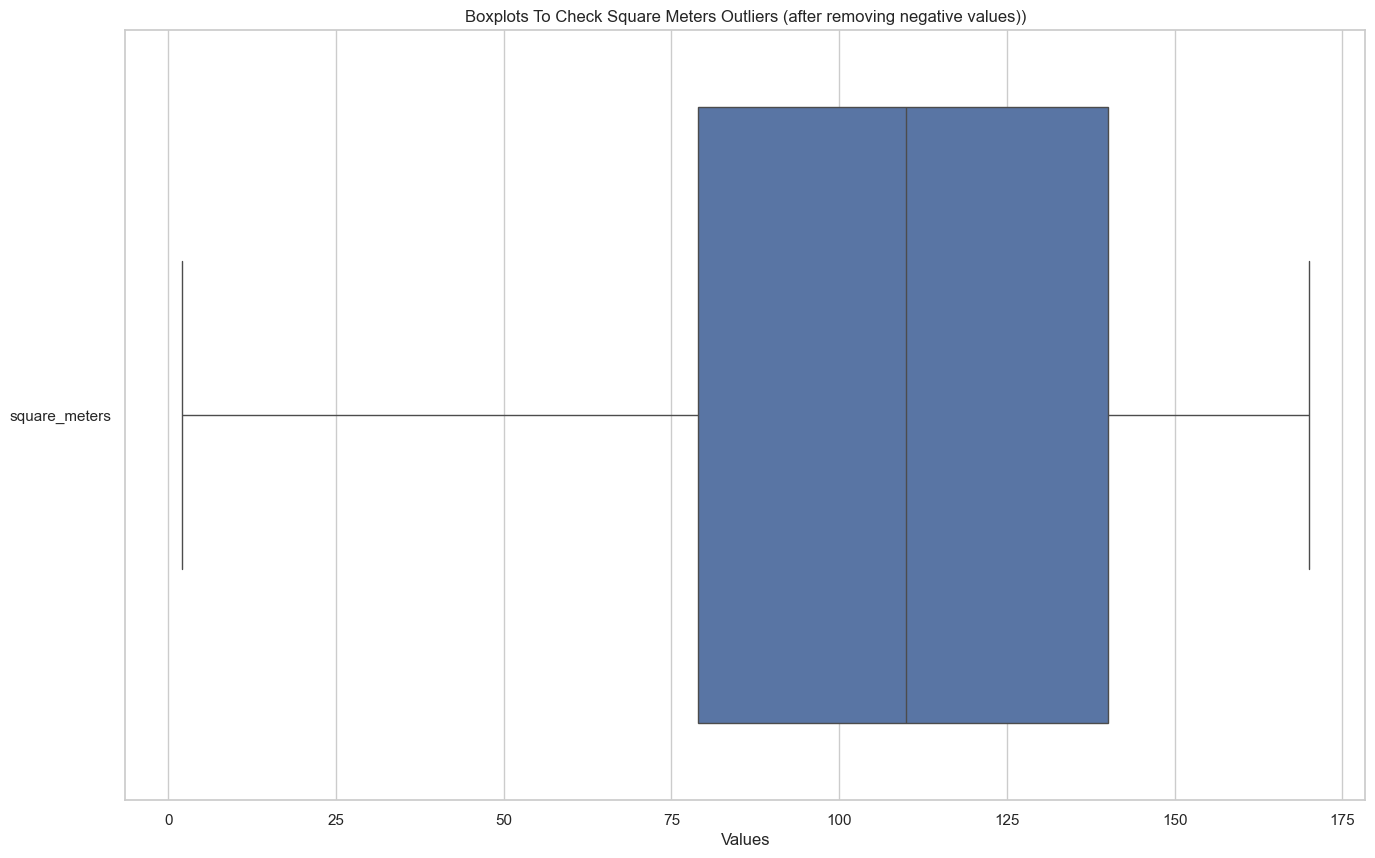

In [58]:
# Replace negative 'square_meters' values with their absolute values in df_train
df_train.loc[df_train['square_meters'] < 0, 'square_meters'] = df_train.loc[df_train['square_meters'] < 0, 'square_meters'].abs()
print(df_train['square_meters'].describe())
display(df_train)

# Create a matrix of boxplots using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))  # Adjust the figsize as needed

# Specify the columns you want to create boxplots for
columns_to_plot = ['square_meters']

# Create the matrix of boxplots
sns.boxplot(data=df_train[columns_to_plot], orient="h")

# Customize the appearance or layout as needed
plt.title("Boxplots To Check Square Meters Outliers (after removing negative values))")
plt.xlabel("Values")
plt.show()


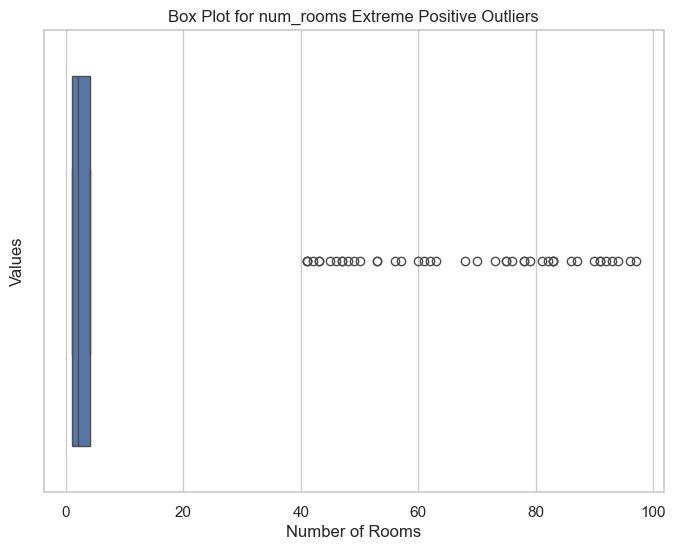

Extreme Positive Outliers:
        id  num_rooms  num_baths  square_meters orientation  year_built  \
86    6481       93.0        3.0          153.0       south      1960.0   
207   6337       47.0        1.0          149.0       north      1980.0   
326   5136       87.0        3.0          154.0        east      1982.0   
367   2692       79.0        2.0          141.0        west      1955.0   
441   7090       82.0        2.0          167.0       south      2004.0   
494   4760       70.0        1.0           89.0        west      1958.0   
597   8579       75.0        1.0          157.0         NaN      1989.0   
660   2860       73.0        NaN          127.0         NaN      1963.0   
663   2725       43.0        1.0          151.0        east      1969.0   
680   9577       57.0        2.0          131.0       north         NaN   
742   7047       48.0        1.0          125.0         NaN      1978.0   
789   9727       92.0        2.0          113.0       south      2020.0  

"\n# Count extreme outliers per neighborhood\noutliers_count_per_neighborhood = extreme_outliers_num_rooms['neighborhood'].value_counts()\n\noutliers_count_per_neighborhood.plot(kind='bar')\nplt.title('Extreme Outliers per Neighborhood')\nplt.xlabel('Neighborhood')\nplt.ylabel('Count of Extreme Outliers')\nplt.show()\n"

In [59]:
# Create a boxplot using Seaborn
sns.set(style="whitegrid")  # Set the plot style
plt.figure(figsize=(8, 6))  
sns.boxplot(x='num_rooms', data=df_train)  # Create the boxplot

plt.xlabel('Number of Rooms')
plt.ylabel('Values')
plt.title('Box Plot for num_rooms Extreme Positive Outliers')
plt.show()

# Identify extreme positive outliers
extreme_outliers_num_rooms = df_train[df_train['num_rooms'] > 12]
print("Extreme Positive Outliers:")
print(extreme_outliers_num_rooms)

count_of_extreme_outliers = extreme_outliers_num_rooms.shape[0]
print("Number of Extreme Positive Outliers:", count_of_extreme_outliers)

total_data_points = len(df_train)
percentage_of_extreme_outliers = (count_of_extreme_outliers / total_data_points) * 100

print("Percentage of Extreme Positive Outliers:", percentage_of_extreme_outliers, "%")

'''
# Count extreme outliers per neighborhood
outliers_count_per_neighborhood = extreme_outliers_num_rooms['neighborhood'].value_counts()

outliers_count_per_neighborhood.plot(kind='bar')
plt.title('Extreme Outliers per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count of Extreme Outliers')
plt.show()
'''

In [ ]:
''' NOT IN USE ANYMORE
from sklearn.impute import KNNImputer

# Set extreme outliers in 'num_rooms' column to NaN
df_train.loc[df_train['num_rooms'] > 12, 'num_rooms'] = np.nan
df_test.loc[df_test['num_rooms'] > 12, 'num_rooms'] = np.nan

# Instantiate KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values in the 'num_rooms' column
df_train['num_rooms'] = imputer.fit_transform(df_train[['num_rooms']])

print(df_train['num_rooms'].describe())
display(df_train)
'''

In [ ]:
''' NOT IN USE ANYMORE
#windsorize square meters and num_rooms to replace outliers with the 95th percentile

# Copy the input data to avoid modifying the original array
winsorized_data = np.copy(df_train)

num_rooms = df_train['num_rooms'].values
square_meters = df_train['square_meters'].values

# Calculate thresholds for winsorizing (e.g., 95th percentile)
threshold_num_rooms = np.percentile(num_rooms, 95)
threshold_square_meters = np.percentile(square_meters, 5)

# Winsorize 'num_rooms' array
num_rooms_winsorized = np.where(num_rooms > threshold_num_rooms, threshold_num_rooms, num_rooms)

# Winsorize negative values of 'square_meters' array
square_meters_winsorized = np.where(square_meters < 0, -threshold_square_meters, square_meters)

# Create a dictionary or new DataFrame to store the winsorized values
winsorized_data = {
    'num_rooms_winsorized': num_rooms_winsorized,
    'square_meters_winsorized': square_meters_winsorized
}

df_winsorized = pd.DataFrame(winsorized_data)

# Print the DataFrame with winsorized values
print(df_winsorized)

print(df_winsorized.describe())

#Work to do on plot
'''
"""plt.figure(figsize=(10, 6))
plt.boxplot([num_rooms, num_rooms_winsorized, square_meters, square_meters_winsorized],
            labels=['Original num_rooms', 'Winsorized num_rooms', 'Original square_meters', 'Winsorized square_meters'])
plt.title('Box Plot for num_rooms and square_meters')
plt.ylabel('Values')
plt.show()"""


In [ ]:
#replace outliers with winsorized values in original dataframe
'''
df_train['num_rooms'] = winsorized_data['num_rooms_winsorized']
df_train['square_meters'] = winsorized_data['square_meters_winsorized']


print(df_train['num_rooms'].describe())
print(df_train['square_meters'].describe())
'''

## <span style = "color: #F96E46"> NOT IN USE ANYMORE </span>
<span style = "color: #F96E46"> MISSING VALUES IMPUTATION </span>
## <span style = "color: #F96E46"> ______________________________________________________________ </span>

In [ ]:
''' NOT IN USE ANYMORE
df_train['square_meters'] = df_train['square_meters'].abs()
df_test['square_meters'] = df_test['square_meters'].abs()
display(df_train['square_meters'].describe())
'''§

In [ ]:
''' NOT IN USE ANYMORE
from sklearn.impute import KNNImputer

df_train_clean = df_train.copy()
df_test_clean = df_test.copy()

selected_vars = ['id',
                'num_rooms',
                'square_meters',
                'num_floor',
                'num_crimes',
                'neighborhood_Les Corts',
                'neighborhood_Sant Andreu',
                'neighborhood_Sant Martí',
                'neighborhood_Sants',
                'neighborhood_Sarrià-Sant Gervasi',
                'neighborhood_Eixample',
                'neighborhood_Gràcia',
                'neighborhood_Horta',
                'neighborhood_Ciutat Vella',
                'neighborhood_Nou Barris',
                'is_furnished',
                'num_baths']

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 100)
imputed_data = imputer.fit_transform(df_train_clean)
imputed_df = pd.DataFrame(imputed_data, columns = df_train_clean.columns)
df_train_clean = imputed_df

imputer = KNNImputer(n_neighbors = 100)
imputed_data = imputer.fit_transform(df_test_clean)
imputed_df = pd.DataFrame(imputed_data, columns = df_test_clean.columns)
df_test_clean = imputed_df

for var in selected_vars:
    #knn_imputer(df_train_clean, [var])
    
    print(f"> {var}: {df_train_clean[var].isna().sum()} missing values")

display(df_train_clean.describe())
df_nan = df_train_clean[df_train_clean['square_meters'].isna()]
display(df_nan)
display(df_train_clean)
'''

In [ ]:
''' NOT IN USE ANYMORE
X_train = df_train_clean[selected_vars].copy()
display(X_train)

y_train = df_train_clean['price'].copy()
display(y_train)

X_test = df_test_clean[selected_vars].copy()
display(X_test)

print(len(X_test['id'].unique()))
'''

## <span style = "color: #F96E46"> INITIAL ANALYSIS, VESTIGIAL, MIGHT NEED TO DELETE </span>

FOR BOOLEANS, REMOVE REFERS TO PAIRWISE DELETION

NUM_BATHROOMS treat identically to num_rooms

SQUARE_METERS a lot of negatives
treat it 3 different ways, 1) remove negatives (just leave values as positives) and then treat outliers with mean imputation, 2) replace with mean per neighborhood, 3) Logical approach

ORIENTATION only relevant in relation to the neighborhood and above a certain floor if it's facing the sea (treat as secondary)

FLOOR treat missing values (by neighborhood)

DOOR the actual door not important but extracting the floor is important

FURNISHED boolean value (secondary), MISSING VALUES REMOVE

HAS POOL boolean value (secondary), MISSING VALUES REMOVE, analyze the effect by neighborhood

NEIGHBORHOOD categorical variable, MISSING VALUES REMOVE, check (secondary check)

NUM_CRIMES ANALYZE PER NEIGHBORHOOD, NEIGHBORHOODS TOO WIDE TREAT CAREFULLY

HAS_AC boolean value, MISSING VALUES REMOVE

ACCEPTS_PETS boolean value, MISSING VALUES REMOVE

NUM_SUPERMARKETS too many missing, JUST REMOVE COLUMN

num_rooms, outliers in > 6, propose removal.

## <span style = "color: #F96E46"> LINEAR MODEL </span>
## <span style = "color: #F96E46"> ______________________________________________________________ </span>

In [15]:
#Ed draft model code

# Import necessary libraries
#from sklearn.model_selection import train_test_split  #split data into training and testing sets
from sklearn.linear_model import LinearRegression #create linear regression model
from sklearn.metrics import mean_squared_error #evaluate the model performance

#Part 1: create model
df_train_dropna = df_train[['id','square_meters', 'num_rooms', 'num_baths', 'price']].dropna(axis=0) 
print(df_train_dropna)

df_test_dropna = df_test[['id', 'square_meters', 'num_rooms', 'num_baths']].fillna(df_test.mean(numeric_only=True)) 
print(df_test_dropna)

# Split the data into features (X) and target (y)
X_train_features = df_train_dropna[['square_meters', 'num_rooms', 'num_baths']] #we need to select the key feature columns 
y_train = df_train_dropna['price'] #what we want to predict

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression() #LR model created and initialised
model.fit(X_train_features, y_train) #trained on the training data using the .fit() function

# Make predictions on the test set
y_pred = model.predict(X_train_features) #via the trained model

#Part 2: Check Model

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred) #measure model performance, lower the MSE the better the fit between the predicted and the actual prices.  
#print(f"Mean Squared Error: {mse}")
#Part 3 Predict and add apartment prices in the test dataset

# Use trained model to predict prices for apartments in the test dataset
#test_data = pd.read_csv('test.csv')  # Load your test dataset
X_test_features = df_test_dropna[['square_meters', 'num_rooms', 'num_baths']]
predicted_prices = model.predict(X_test_features)

# Add the predicted prices to the test dataset
df_test_dropna['price'] = predicted_prices
df_test_dropna['price'] = df_test_dropna['price'].astype(int)
df_test_dropna['price'].describe()

# Save the test dataset with predicted prices to a new CSV file
df_test_dropna[['id', 'price']].to_csv('predicted_apartment_prices.csv', index=False)

        id  square_meters  num_rooms  num_baths  price
1     1562          133.0        4.0        1.0   1396
2     1671          137.0        2.0        3.0   1263
3     6088          -41.0        1.0        2.0   1290
4     6670           70.0        2.0        1.0    962
5     5934           77.0        4.0        2.0    760
...    ...            ...        ...        ...    ...
7994  6266           62.0        3.0        3.0    928
7996  5192          166.0        4.0        3.0   1255
7997  5391           89.0        4.0        1.0   1220
7998   861          167.0        4.0        2.0   1547
7999  7271           95.0        2.0        1.0   1133

[7527 rows x 5 columns]
        id  square_meters  num_rooms  num_baths
0     6253          152.0   4.533444        1.0
1     4685           90.0   4.533444        2.0
2     1732           86.0   4.533444        2.0
3     4743          164.0   4.533444        3.0
4     4522           99.0   4.533444        1.0
...    ...            ...  

,id,square_meters,num_rooms,num_baths,price
0,6253,152.0,4.533444,1.0,1292
1,4685,90.0,4.533444,2.0,1016
2,1732,86.0,4.533444,2.0,997
3,4743,164.0,4.533444,3.0,1364
4,4522,99.0,4.533444,1.0,1049
...,...,...,...,...,...
1995,6413,95.0,3.000000,3.0,1046
1996,8286,161.0,1.000000,2.0,1340
1997,7854,111.0,4.000000,3.0,1120
1998,1096,154.0,2.000000,1.0,1300


,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets
0,6253,NaN,1.0,152.0,NaN,2012.0,5º - 4a,True,True,Les Cors,0.0,False,False,NaN
1,4685,NaN,2.0,90.0,east,1957.0,10º - 1a,True,False,Ciutat Vella,2.0,False,True,3.0
2,1732,NaN,2.0,86.0,NaN,1991.0,5º - 2a,False,False,Eixample,0.0,False,True,NaN
3,4743,NaN,3.0,164.0,NaN,2002.0,8º - 4a,False,True,Nou Barris,7.0,False,False,NaN
4,4522,NaN,1.0,99.0,NaN,1984.0,8º - 4a,True,True,Sant Andreu,0.0,True,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6413,3.0,3.0,95.0,south,1976.0,5º - 2a,True,True,Sarrià-Sant Gervasi,0.0,True,True,NaN
1996,8286,1.0,2.0,161.0,NaN,1984.0,5º - 1a,True,False,Nou Barris,9.0,False,False,NaN
1997,7854,4.0,3.0,111.0,NaN,1957.0,4º - 2a,True,True,Gràcia,0.0,False,True,NaN
1998,1096,2.0,1.0,154.0,north,2018.0,9º - 1a,False,False,Nou Barris,7.0,False,False,NaN


In [200]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #LR model created and initialised
model.fit(X_train, y_train) #trained on the training data using the .fit() function

# Make predictions on the test set
y_pred = model.predict(X_train) #via the trained model

predicted_prices = model.predict(X_test)

# Add the predicted prices to the test dataset
X_test['price'] = predicted_prices
X_test['price'] = X_test['price'].astype(int)
X_test['price'].describe()

# Save the test dataset with predicted prices to a new CSV file
X_test[['id', 'price']].to_csv('predicted_apartment_prices_v2.csv', index=False)

# <SPAN STYLE = 'COLOR: YELLOW'> NATALIA'S LASSO AND RIDGE MODELS GO BELOW HERE </SPAN>
# <SPAN STYLE = 'COLOR: RED'> ________________________________________________________________________________________________ </SPAN>

Try lasso, ridge and linear model, BEGIN WITH LINEAR